In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:

df=pd.read_csv('/Users/simennaess/Documents/Master/Ukentlig_vareid_ys_kunde_time_lag_15_20.csv', parse_dates=['Ukedato'], sep=";", decimal=",", header=0)


In [3]:
df_grouped=df.groupby(['Ukedato','Vare_Id']).agg({'Salg_sum':'sum', 'Pris':'mean','Kampanje':'mean','Omsetning_sum':'sum','Varebeholdning_sum':'sum','Ferie_max':'mean','Salg_sum_lag_1':'sum','Salg_sum_lag_2':'sum','Salg_sum_lag_3':'sum'}).rename(columns={'Salg_sum':'Sales', 'Pris':'Price','Kampanje':'Sales Promotion','Omsetning_sum':'Turnover', 'Varebeholdning_sum':'Inventory','Ferie_max':'Vacation','Salg_sum_lag_1':'Sales_lag_1','Salg_sum_lag_2':'Sales_lag_2','Salg_sum_lag_3':'Sales_lag_3' }).reset_index()

def list_of_products_from_most_to_least_sales(df):
    df_topsalg=df.groupby(['Vare_Id']).agg({'Salg_sum':'sum'}).rename(columns={'Salg_sum':'Sales'})
    df_topsalg.sort_values(by='Sales', ascending=False,inplace=True)
    df_topsalg.reset_index(inplace=True)
    df_topsalg['Products']=df_topsalg.index
    top_products=df_topsalg['Vare_Id'].to_list()
    return top_products
                                            
products=list_of_products_from_most_to_least_sales(df)


In [6]:
def heat_map(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sb.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .3}, annot=True)
    
    

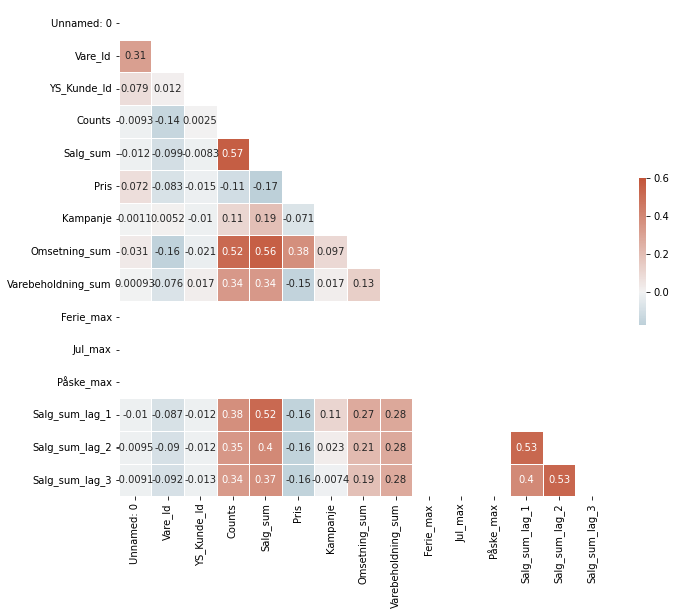

In [8]:
heat_map(df)

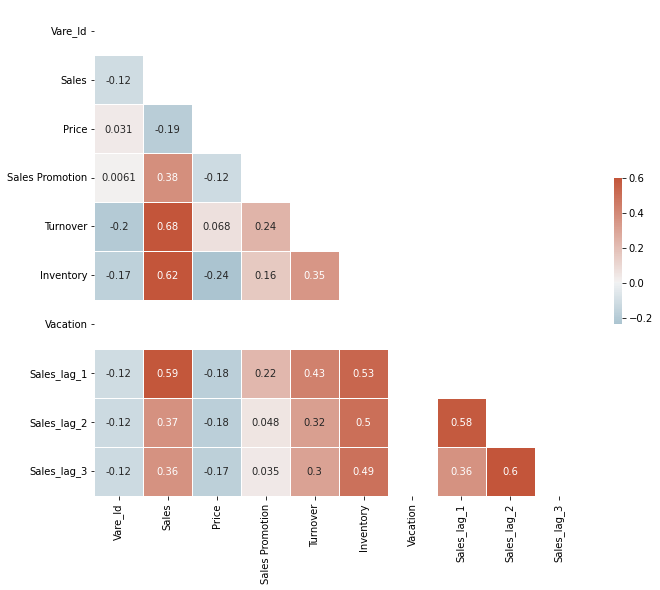

In [11]:
heat_map(brand2)

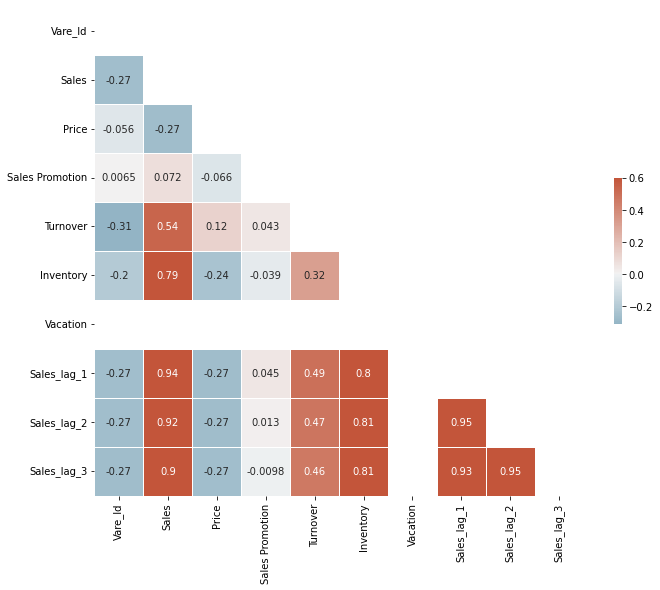

In [12]:
heat_map(brand3)